In [ ]:
import warnings


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


warnings.filterwarnings("ignore")


df = pd.read_csv('star.csv')

In [ ]:
df.drop(columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID'], inplace = True)

In [ ]:
df.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [ ]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)

In [ ]:
df.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,1,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,1,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,1,0.116123,6121,56187


In [ ]:
from sklearn.model_selection import train_test_split
y = df[['plate']]
X = df.drop(columns=['plate'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,MJD
0,-0.233606,0.780629,0.010235,0.025180,0.466470,0.308291,0.019832,1.566127,0.825350,0.112973,-0.009503
1,-1.539196,0.456487,0.109736,0.104784,0.990348,0.739187,0.020970,0.936810,0.825350,0.323404,1.408856
2,-0.350578,-0.370241,0.018827,0.025646,-0.054066,-0.117973,-0.006938,-0.951142,0.825350,-0.236391,0.228180
3,-0.236756,0.536745,-0.047879,-0.055627,-1.113380,-1.089799,-0.050481,1.566127,0.825350,-0.640218,-1.232740
4,0.362422,0.625811,0.002248,0.026980,0.906338,1.238123,0.071248,-0.321825,-1.211608,-0.790410,-0.176433


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

def show_metrics(y_test, y_pred, model_name):
    print(f"Метрики качества {model_name}")
    mse = mean_squared_error(y_test, y_pred)
    mae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"  - MSE: {mse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R2 score: {r2:.4f}")

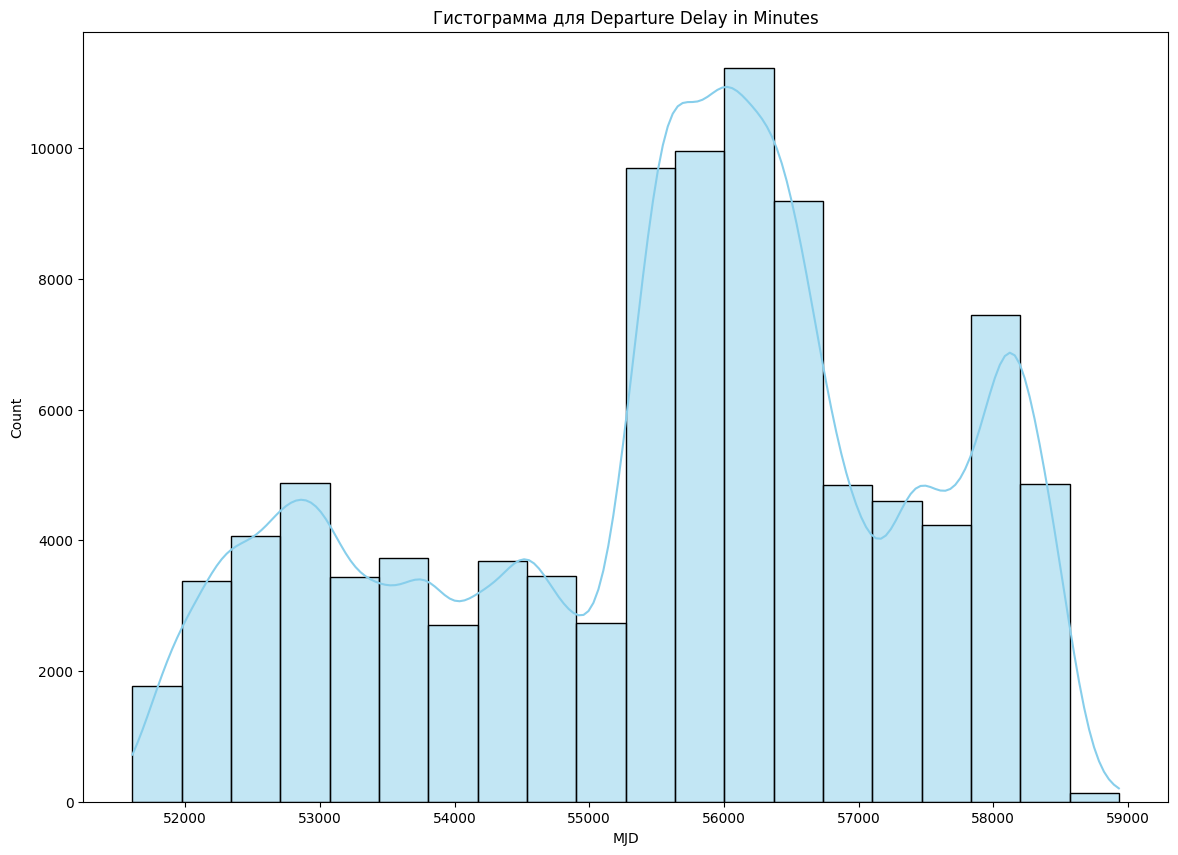

In [ ]:
plt.figure(figsize=(14, 10))

sns.histplot(df['MJD'], kde=True, bins=20, color='skyblue')
plt.title(f'Гистограмма для Departure Delay in Minutes')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_ln_pred = lr.predict(X_test)
show_metrics(y_test, y_ln_pred, 'Линейной регрессии')

Метрики качества Линейной регрессии
  - MSE: 485189.2717
  - MAE: 495.3360
  - R2 score: 0.9438


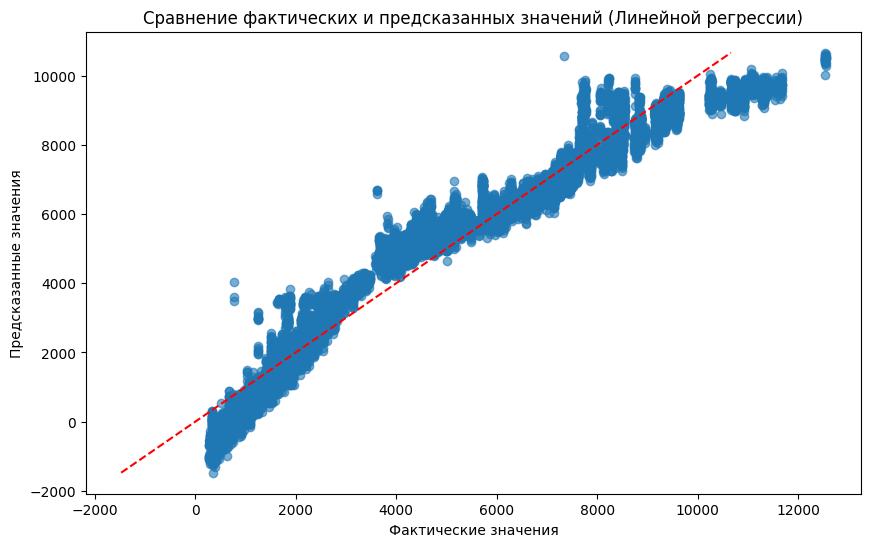

In [ ]:
def visualize_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], '--r')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'Сравнение фактических и предсказанных значений ({model_name})')
    plt.show()

visualize_predictions(y_test, y_ln_pred, "Линейной регрессии")

In [ ]:
from sklearn.linear_model import Lasso

ls = Lasso(random_state=42)
ls.fit(X_train, y_train)

Lasso(random_state=42)

In [ ]:
y_ls_pred = ls.predict(X_test)

In [ ]:
show_metrics(y_test, y_ls_pred, "LASSO регресии")

Метрики качества LASSO регресии
  - MSE: 489718.9705
  - MAE: 500.2543
  - R2 score: 0.9433


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

ls = Lasso(random_state=42)
search_ls = GridSearchCV(ls, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
search_ls.fit(X_train, y_train)
print("Best parameters:", search_ls.best_params_)
y_ls_pred = search_ls.best_estimator_.predict(X_test)

Best parameters: {'alpha': 10}


In [ ]:
show_metrics(y_test, y_ls_pred, "итоговой LASSO регрессии")

Метрики качества итоговой LASSO регрессии
  - MSE: 503081.6296
  - MAE: 508.1226
  - R2 score: 0.9418


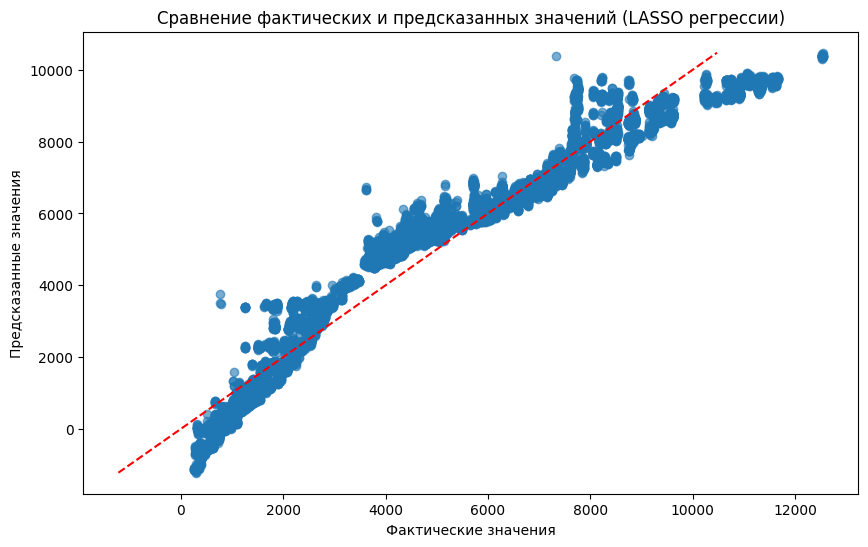

In [ ]:
visualize_predictions(y_test, y_ls_pred, "LASSO регрессии")

In [ ]:
from sklearn.linear_model import Ridge

rd = Ridge(random_state=42)
rd.fit(X_train, y_train)

Ridge(random_state=42)

In [ ]:
y_rd_pred = rd.predict(X_test)

In [ ]:
show_metrics(y_test, y_rd_pred, "Ридж регрессии")

Метрики качества Ридж регрессии
  - MSE: 485227.5401
  - MAE: 495.0204
  - R2 score: 0.9438


In [ ]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

rd = Ridge(random_state=42)
search_rd = GridSearchCV(ls, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
search_rd.fit(X_train, y_train)
print("Best parameters:", search_rd.best_params_)
y_rd_pred = search_rd.best_estimator_.predict(X_test)

Best parameters: {'alpha': 10}


In [ ]:
show_metrics(y_test, y_rd_pred, "итоговой Ридж регрессии")

Метрики качества итоговой Ридж регрессии
  - MSE: 503081.6296
  - MAE: 508.1226
  - R2 score: 0.9418


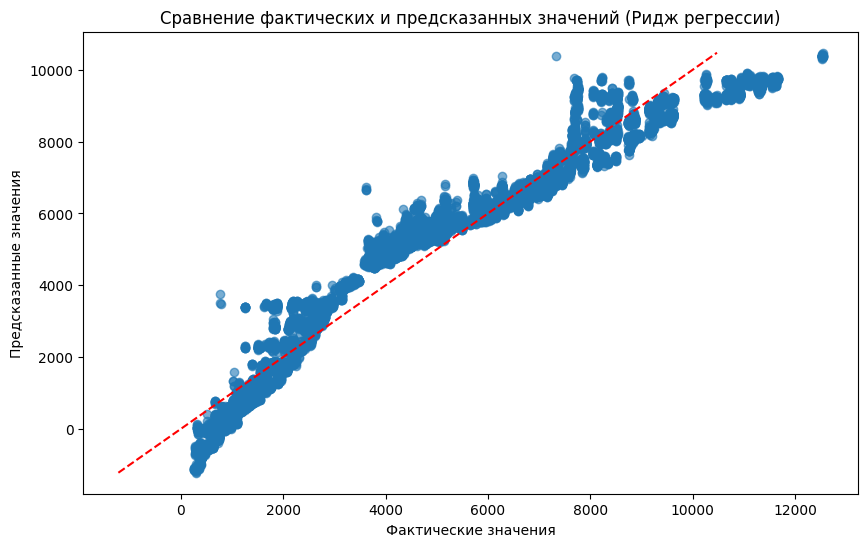

In [ ]:
visualize_predictions(y_test, y_rd_pred, "Ридж регрессии")

In [ ]:
lr_coefficients = lr.coef_
ls_coefficients = search_ls.best_estimator_.coef_
rd_coefficients = search_rd.best_estimator_.coef_
print(len(np.abs(lr_coefficients)[0]))
print(len(X_train.columns))

11
11


In [ ]:
lr_coefficients = lr.coef_
lr_importance = pd.Series(np.abs(lr.coef_)[0], index=X_train.columns).sort_values(ascending=False)

ls_coefficients = search_ls.best_estimator_.coef_
ls_importance = pd.Series(np.abs(ls_coefficients), index=X_train.columns).sort_values(ascending=False)

rd_coefficients = search_rd.best_estimator_.coef_
rd_importance = pd.Series(np.abs(rd_coefficients), index=X_train.columns).sort_values(ascending=False)

In [ ]:
def visualize_importance(model_importance, model_name):
    plt.figure(figsize=(10, 6))
    model_importance[model_importance != 0].head(15).plot(kind='barh')
    plt.title(f"Feature Importance для {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

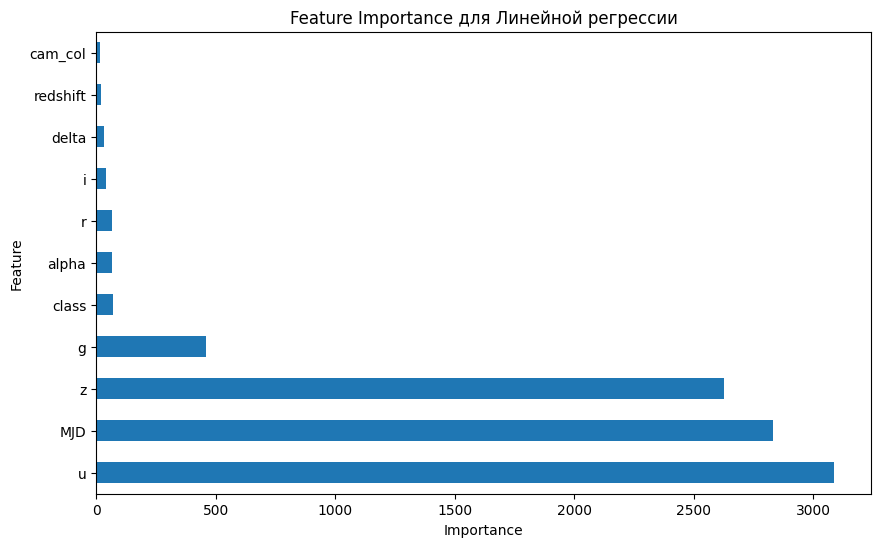

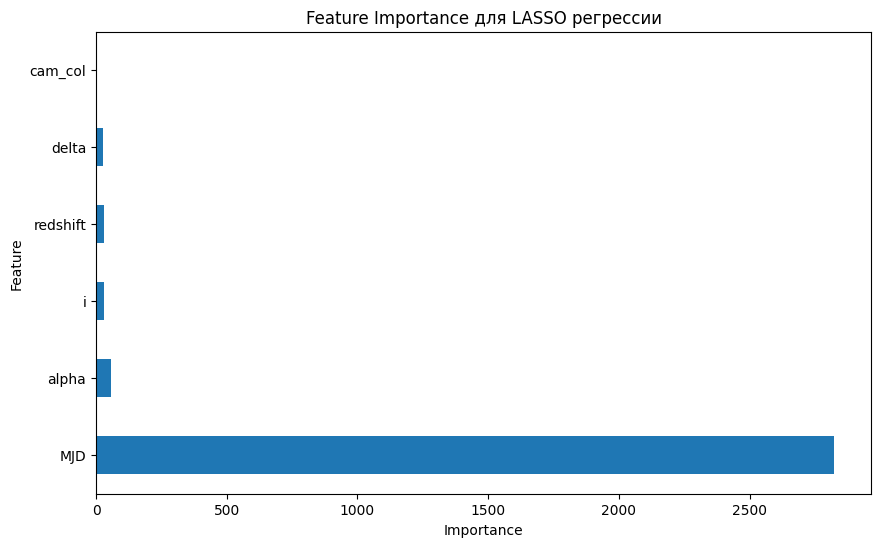

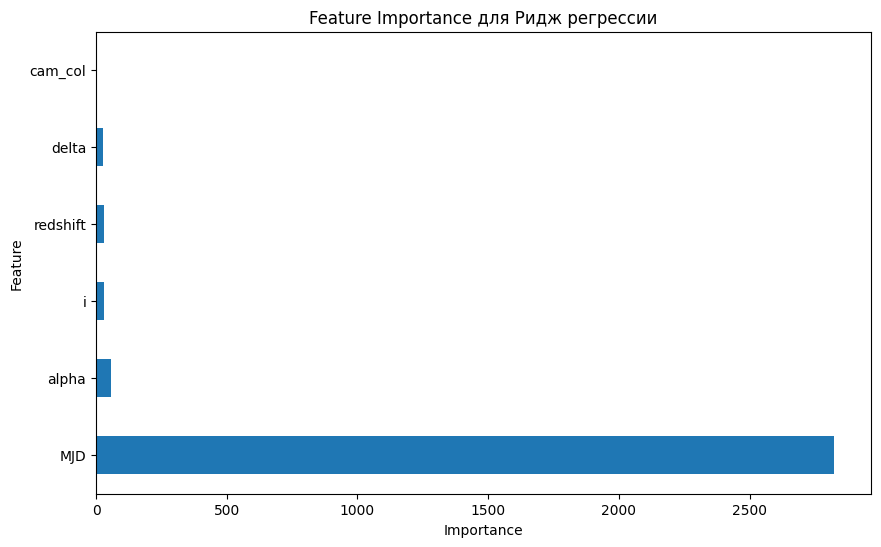

In [ ]:
visualize_importance(lr_importance, "Линейной регрессии")
visualize_importance(ls_importance, "LASSO регрессии")
visualize_importance(rd_importance, "Ридж регрессии")